# Les zones d'aménagement, c'est quoi?

Jadis, l'agriculture s’est appuyée sur le principe de l’homogénéité des parcelles qui implique des interventions culturales (travail du sol, semis, fertilisation, protection des cultures) uniformes sur chaque parcelle. Deux raisons principales ont justifié cette approche: (a) la taille réduite des parcelles,  et (b) l’absence de moyens techniques accessibles pour appréhender cette apparence d'homogénéité.

<figure>
  <img
  src="/work/images/modulation-automatique-farmstar.jpg"
  alt="Source: https://uneal.com/cms_optimiser-fertilisation-OAD">
  <figcaption>Figure 2: Example de variabilité intra-parcellaire non perceptible par une observation visuelle.</figcaption>
</figure>

Pour adresser ce défi inhibant l’amélioration des efficiences agronomique et écologique de leur parcelle, les « anciens » avaient découpé leurs terres en petites parcelles apparemment homogènes, pour ajuster les interventions sur chacune. Ce n'est qu'à partir des années 90s, avec l'autorisation du Président américain Ronald Reagan de fournir l'accès gratuit aux signaux GPS pour des usages non-militaires, que l'on devient capable de cartographier et diagnostiquer systématiquement la variabilité intraparcellaire. 

Trois principaux éléments sont à considérer pour la quantification de la variabilité intra-parcellaire:

<figure>
  <img
  src="/work/images/3 éléments de variabilitéspotifarm.jpg"
  alt="Source: https://uneal.com/cms_optimiser-fertilisation-OAD">
  <figcaption>Figure 3: Example de variabilité intra-parcellaire non perceptible par une observation visuelle.</figcaption>
</figure>

Les cinq facteurs à considérer pour caractériser la variabilité intra-parcellaire:

<figure>
  <img
  src="/work/images/facteurshetero.jpg"
  alt="Source: https://uneal.com/cms_optimiser-fertilisation-OAD">
  <figcaption>Figure 4: Example de variabilité intra-parcellaire non perceptible par une observation visuelle.</figcaption>
</figure>


Pendant cette séance, nous ciblons l'étape 2: Décision ou Transformation des données. NOMBRE DE COUCHES NECESSAIRES. Il y a deux types de données: (a) les données spatiales discrètes et (b) les données spatiales continues. 

Les données spatiales discrètes sont des données géoréférencées mesurées à des emplacements spécifiques ou issues d'analyse sur des échantillons prélevés à  à des emplacements spécifiques (ex: sols, rendement).

<figure>
  <img
  src="/work/images/soil samples.png"
  alt="Source: https://uneal.com/cms_optimiser-fertilisation-OAD">
  <figcaption>Figure 5: Example de variabilité intra-parcellaire non perceptible par une observation visuelle.</figcaption>
</figure>

Les données spatiales continues représentent la couverture continue d'un phénomène ou d'une intervention à l'échelle spatiale d'intérêt (ferme, parcelle, bassin versant, etc.) sous forme de cartes. Ces données sont également appelées données de terrain, non discrètes ou de surface (modèle numérique de terrain, les indices de végétation, le rendement, etc). 

À noter qu'on peut, à partir de techniques d'échantillonage et d'algorithmes d'interpolation, passer des données spatiales discrètes aux données spatiales continues et vice-versa. Les données spatiales continues sont d'intérêt du au fait qu'elles representent de manière quasi-intuitive la variabilité intra-parcellaire, ce qui permet une catégorisation, classification ou regroupement des zones de la ferme ayant une ou plusieurs caractéristiques communes, donc homogènes, définies à partir de mesure des éléments de variabilité précités. Ces zones, dites zones d'amenagement, ont souvent des géométries variables. 

<figure>
  <img
  src="/work/images/ndvi_agriculture3_pixwing.jpg"
  alt="   ">
  <figcaption>Figure 6: Example de variabilité intra-parcellaire non perceptible par une observation visuelle.</figcaption>
</figure>

# Étapes de création des zones d'amenagement

<figure>
  <img
  src="/work/images/zonesamenagement.png"
  alt="   ">
  <figcaption>Figure 7: Example de variabilité intra-parcellaire non perceptible par une observation visuelle.</figcaption>
</figure>

Le zonage de la parcelle ainsi obtenu devient un outil de travail indispensable pour moduler les interventions culturales et les doses d’intrants. 

# Un exemple de recette pour la délimitation des zones d'aménagement à partir de données pédologiques

Étape 1: Importation d'un premier jeu d'outils nécessaires 

In [ ]:
#Appel des fonctions, classes, et bibliothèques pertinentes
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

Étape 2: Importation, nettoyage, et visualisation des données

  Name            X            Y    Cu   Zn     Fe      CLAY       SILT  \
0   T0  341378.1216  5000020.031  31.0  101  36859  0.420831  63.952456   
1   T1  341545.3997  4999941.990  22.0  121  37845  0.070021  42.206702   
2   T2  341542.4324  5000006.869  14.0  101  34976  0.073038  40.662662   
3  T3   341374.3735  4999998.221  24.0  110  38034  0.213830  48.585886   
4   T4  341757.4170  4999933.235  38.0  185  48742  0.107165  51.059456   

        SAND  
0  35.626712  
1  57.723276  
2  59.264300  
3  51.200287  
4  48.833378  


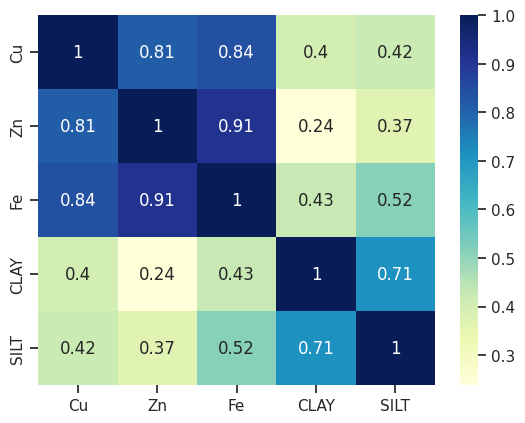

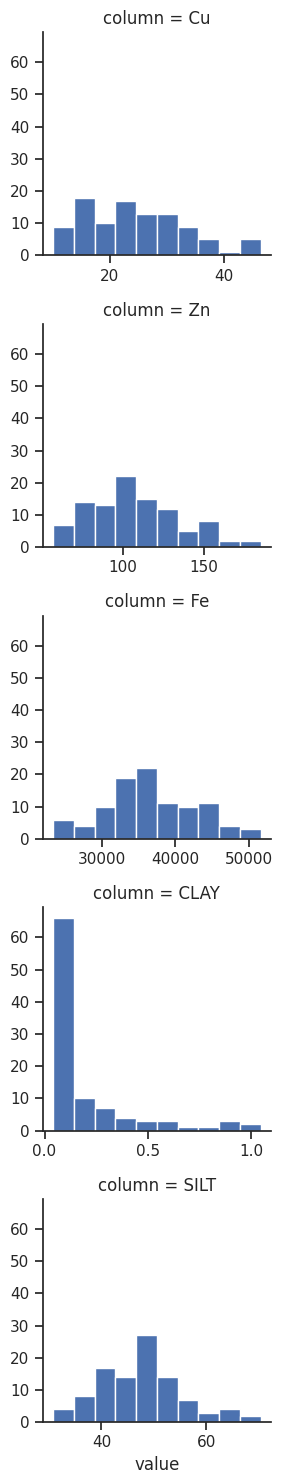

In [ ]:
#Simple configuration pour l'affichage des graphes
sns.set_theme(style="ticks")

#Lecture du fichier de données échantillonées
fichier_de_données = Path('/work/Tou1_2021.csv')
données = pd.read_csv(fichier_de_données, sep=';')
print(données.head())

#Lecture du fichier de délimitation de la ferme
shape_file = gpd.read_file('/work/Tou1.shp')

#Extraction et affichage des colonnes d'intérêt
données_sols = données.iloc[:, 3:8]

#Affichage de la matrice de corrélation entre les variables 
dataplot = sns.heatmap(données_sols.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

#Transformation des données avec la fonction melt de pandas pour visualisation avec la bibliothèque seaborn
données_transformées = données_sols.melt(var_name='column')

#Visualisation des données avec la classe FacetGrid de la bibliothèque seaborn
g = sns.FacetGrid(données_transformées, row='column', sharex=False)
g.map(plt.hist, 'value')

Étape 3: Importation d'un nouveau jeu d'outils nécessaires à la prochaine étape

In [ ]:
#Appel des fonctions, classes, et bibliothèques pertinentes
import numpy as np
from pykrige.ok import OrdinaryKriging
import skgstat as skg
from shapely import geometry
from pyproj import Transformer

Étape 4: Visualisation spatialisée des données échantillonnées

  Name            X            Y    Cu   Zn     Fe      CLAY       SILT  \
0   T0  341378.1216  5000020.031  31.0  101  36859  0.420831  63.952456   
1   T1  341545.3997  4999941.990  22.0  121  37845  0.070021  42.206702   
2   T2  341542.4324  5000006.869  14.0  101  34976  0.073038  40.662662   
3  T3   341374.3735  4999998.221  24.0  110  38034  0.213830  48.585886   
4   T4  341757.4170  4999933.235  38.0  185  48742  0.107165  51.059456   

        SAND                        geometry           East         North  
0  35.626712  POINT (182759.217 5006339.113)  182759.216718  5.006339e+06  
1  57.723276  POINT (182922.039 5006251.798)  182922.039470  5.006252e+06  
2  59.264300  POINT (182922.690 5006316.801)  182922.690034  5.006317e+06  
3  51.200287  POINT (182754.255 5006317.525)  182754.255410  5.006318e+06  
4  48.833378  POINT (183133.434 5006231.232)  183133.434414  5.006231e+06  


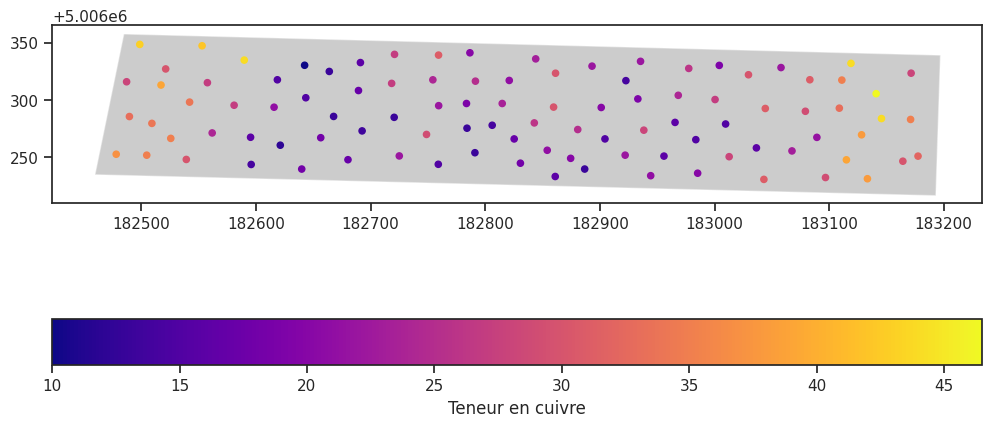

In [ ]:
#Systèmes de coordonnées de références
scr_origine = "epsg:32188"
scr_de_travail = "epsg:32619"

#Reprojection des données dans le système de référence UTM
trans = Transformer.from_crs(scr_origine, scr_de_travail, always_xy=True)
East, North = trans.transform(données["X"].values, données["Y"].values)

#Recréation de la structure des données échantillonés
gdf = gpd.GeoDataFrame(données, geometry=gpd.points_from_xy(East, North), crs=scr_de_travail)
gdf["East"] = East
gdf["North"] = North
print(gdf.head())

#Visualisation spatialisées des données échantillonés
fig, ax = plt.subplots(figsize=(12,10))
shape_file = shape_file.to_crs(scr_de_travail) #UTM Zone 19 N
shape_file.plot(ax=ax, alpha=0.4, color='grey', legend=True)
gdf.plot(column='Cu', ax=ax, markersize=20, cmap='plasma',marker='o',label='Soil Samples', 
         legend=True, legend_kwds={"label": "Teneur en cuivre", "orientation": "horizontal"})

plt.show()

Étape 5: Premier traitement des données échantillonnées (relations spatiales entre les valeurs mesurées)

Première loi de la géographie de Waldo Tobler: Tout interagit avec tout, mais deux objets proches ont plus de chances de le faire que deux objets éloignés. Le concept de Variogramme met en application cette loi et requiert la précision de la distance maximum (max lag) entre des paires de points pour lesquelles la corrélation spatiale est calculée.

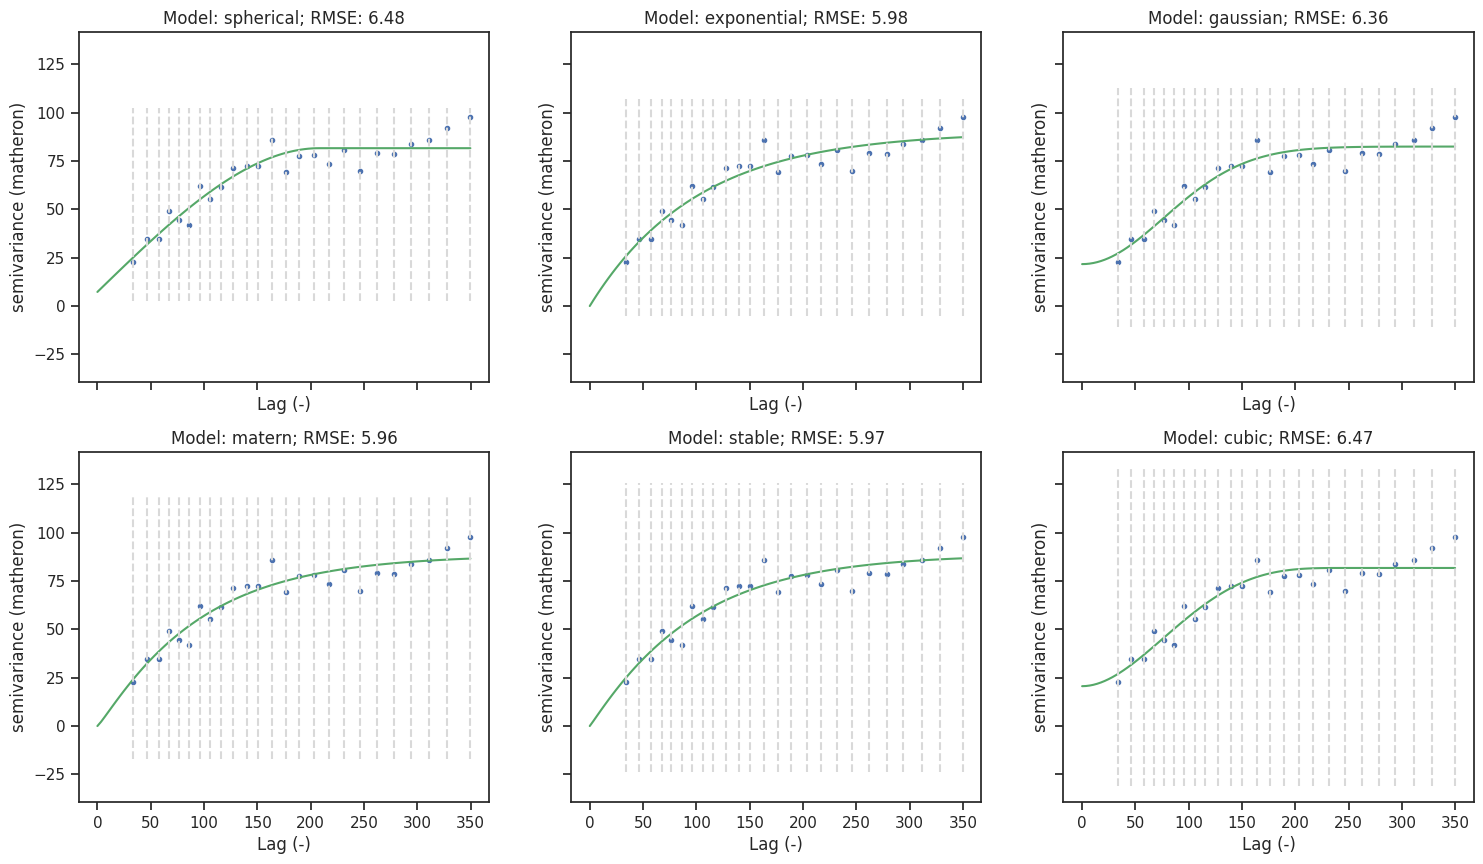

In [ ]:
#
position_variable_dinteret = 3
variable = données.columns[position_variable_dinteret]
valeurs = données[variable]

maxlag = 0.5      # distance maximale entre les paires de points (moitié de la distance maximale 
                   #entre deux points du jeu de données)
n_lags = 25         # nombre de sous-groupes de données à utiliser

coordonnees = gdf[["East","North"]].values

#Calcul du (semi-)variogramme empirique: entre chaque paire de points dans une portion des données 
variogram = skg.Variogram(coordinates=coordonnees, values=valeurs, bin_func='uniform', model="spherical", 
    use_nugget=True, n_lags=n_lags, maxlag=maxlag)

# Visualization of the variograms for different models
fig, _a = plt.subplots(2,3, figsize=(18, 10), sharex=True, sharey=True)
axes = _a.flatten()

#Essayer plusieurs modèles théoriques et vérifier lequel correspondrait mieux au variogramme empirique
for i, model in enumerate(('spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic')):
    variogram.model = model
    variogram.plot(axes=axes[i], hist=False, show=False)
    axes[i].set_title('Model: %s; RMSE: %.2f' % (model, variogram.rmse))

Étape 6: Choix du modèle de variogramme théorique 

{'model': 'exponential', 'estimator': 'matheron', 'dist_func': 'euclidean', 'normalized_effective_range': 105606.48441573649, 'normalized_sill': 8804.27491907919, 'normalized_nugget': 3.2573887079325045e-14, 'effective_range': 301.89932437958913, 'sill': 90.13752692102281, 'nugget': 3.3348908916648167e-16, 'bin_func': 'uniform', 'normalize': False, 'fit_method': 'trf', 'fit_sigma': None, 'use_nugget': True, 'maxlag': 349.8120331337986, 'n_lags': 25, 'verbose': False}


<function matplotlib.pyplot.close(fig=None)>

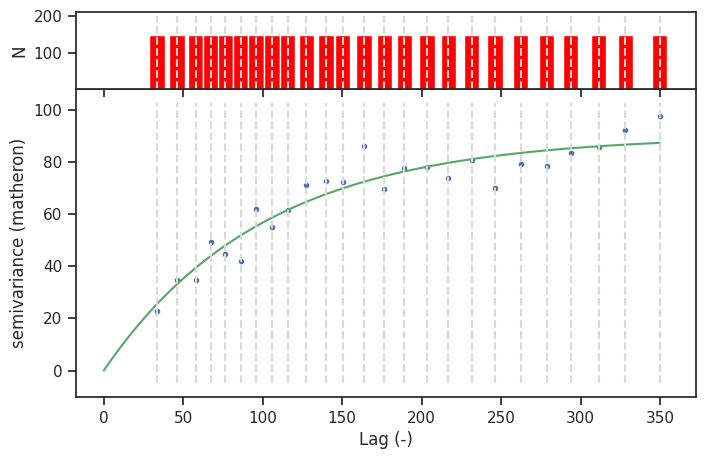

In [ ]:
#Calcul du variogrammme
variogram = skg.Variogram(coordinates=coordonnees, values=valeurs, 
                            model='exponential', bin_func='uniform', 
                            use_nugget=True, n_lags=n_lags, maxlag=maxlag)
parametres_du_variogramme = variogram.describe(flat=True)
print(parametres_du_variogramme)

#Visulation des variogrammes empiriques et théoriques
variogram.plot()
plt.close

Étape 7: Choix d'un modèle d'interpolation (couverture surfacique|pixelisation?) de type géostatistique de la famille du Krigeage

PVI: Le krigeage est un éponyme de l'ingénieur minier Sud-Africain Daine Krige.

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'exponential' Variogram Model
Partial Sill: 90.13752692102281
Full Sill: 90.13752692102281
Range: 301.89932437958913
Nugget: 3.3348908916648167e-16 

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



<a list of 13 text.Text objects>

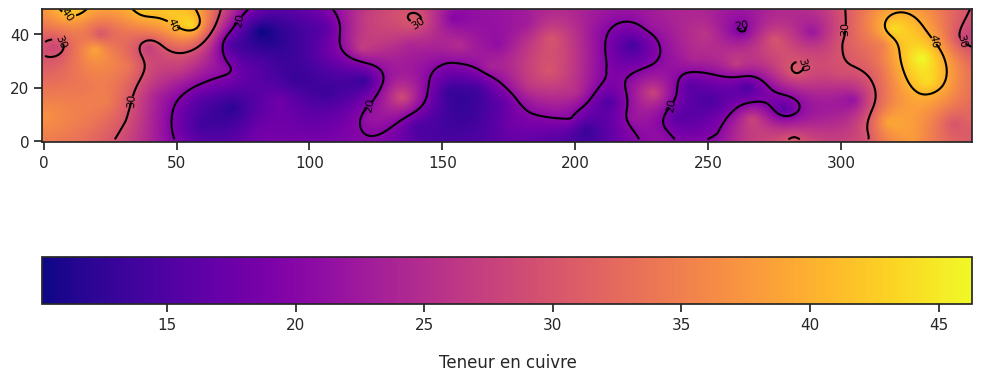

In [ ]:
#Création d'une grille permettant la création de la couverture surfacique
grid_lon = np.linspace(East.min(), East.max(), 350)
grid_lat =  np.linspace(North.min(), North.max(), 50)

#Récupération des paramètres du variogramme théorique
parametres_du_variogramme = {'sill': parametres_du_variogramme["sill"], 
                             'range': parametres_du_variogramme["effective_range"], 
                             'nugget': parametres_du_variogramme["nugget"]
                        }

OK = OrdinaryKriging(East, North, gdf["Cu"], variogram_model='exponential', 
                    variogram_parameters=parametres_du_variogramme, verbose=True, 
                    enable_plotting=False,nlags=30)
gridded_data, _ = OK.execute('grid', grid_lon, grid_lat)


fig, ax = plt.subplots(figsize=(12,10))
im = ax.imshow(gridded_data, cmap='plasma', origin='lower')
contour = ax.contour(gridded_data, colors='black', levels=3, origin='lower') 
cbar = plt.colorbar(im,location="bottom") 
cbar.ax.get_xaxis().labelpad = 15
cbar.ax.set_xlabel('Teneur en cuivre')
plt.clabel(contour, inline=True, fontsize=8)

Étape 8: Importation d'un nouveau jeu d'outils nécessaires à la prochaine étape

In [ ]:
import sklearn.cluster as skc
from sklearn import cluster
import rasterio
from rasterio.features import rasterize
from rasterio import plot
from rasterio.plot import show

Étape 9: Détermination du nombre de zones potentielles par regroupement spatial des valeurs mesurées

/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

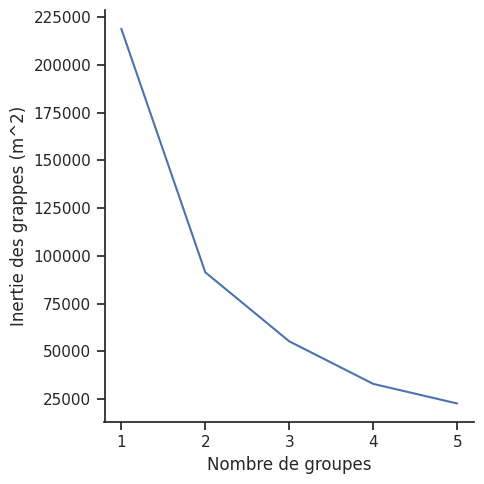

In [ ]:
#Détermination du nombre de groupes ou clusters par la méthode du l'épaule (Elbow method)
inertias = [] #la somme de la distance carrée entre chaque point et le centroïde de la grappe
nombre_maximal_de_groupes = 6

for i in range(1, nombre_maximal_de_groupes):
    kmeans = skc.KMeans(n_clusters=i)
    kmeans.fit(gridded_data)
    inertias.append(kmeans.inertia_)
graphe = sns.relplot(x=range(1,nombre_maximal_de_groupes), y=inertias, kind='line')
graphe.set_axis_labels( "Nombre de groupes" , "Inertie des grappes (m^2)" ) 

Étape 10: Création des grappes à partir des résultats de la méthode de l'épaule

/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
[[24.91096762]
 [16.94103624]
 [35.70078231]]


Text(0.5, 0, 'Teneur en cuivre')

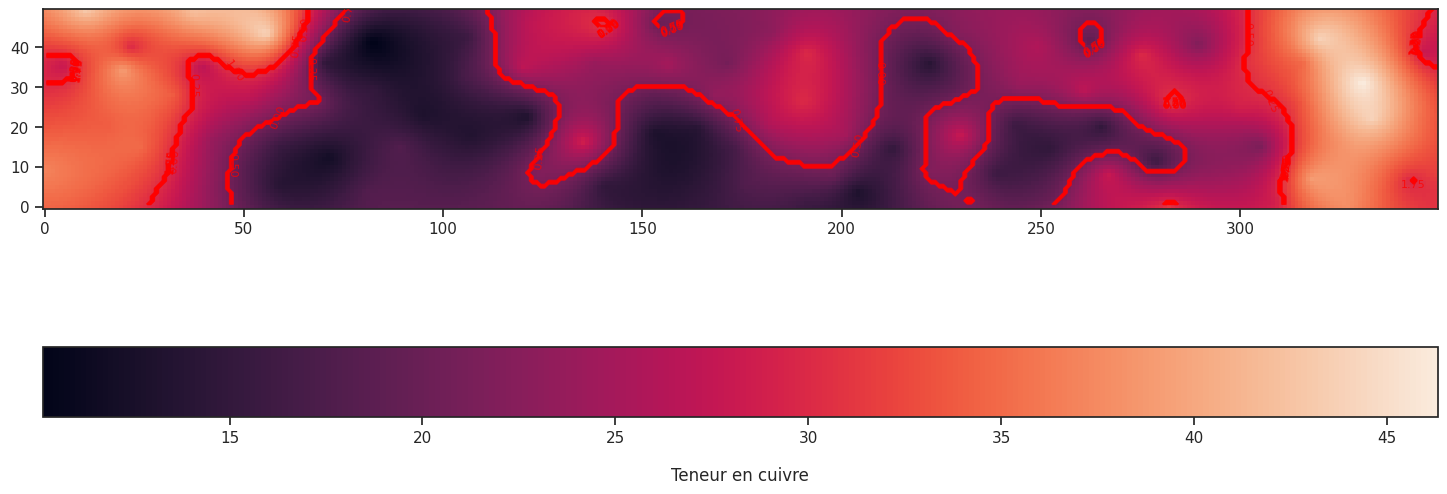

In [ ]:
#Création des grappes
k_means = cluster.KMeans(n_clusters=3)
k_means.fit_predict(gridded_data.flatten().reshape((-1,1))) #point important à faire ici
cluster_centers = k_means.cluster_centers_
print(cluster_centers)

#Visualisation des grappes
clusters = k_means.labels_
clusters = clusters.reshape(gridded_data.shape)
fig, ax = plt.subplots(figsize=(18,12))
image_hidden = ax.imshow(gridded_data, origin='lower') 
plot.show(np.flipud(clusters), ax=ax, contour=True)
cbar = plt.colorbar(image_hidden,location="bottom") 
cbar.ax.get_xaxis().labelpad = 15
cbar.ax.set_xlabel('Teneur en cuivre')

Étape 11: Segmentation ou départagement des grappes obtenues (Multipolygones vers Polygones)

(50, 350) (50, 350) (50, 350)
/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/shared-libs/python3.8/py/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/shared-libs/python3.8/py/lib/python3.8/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set o

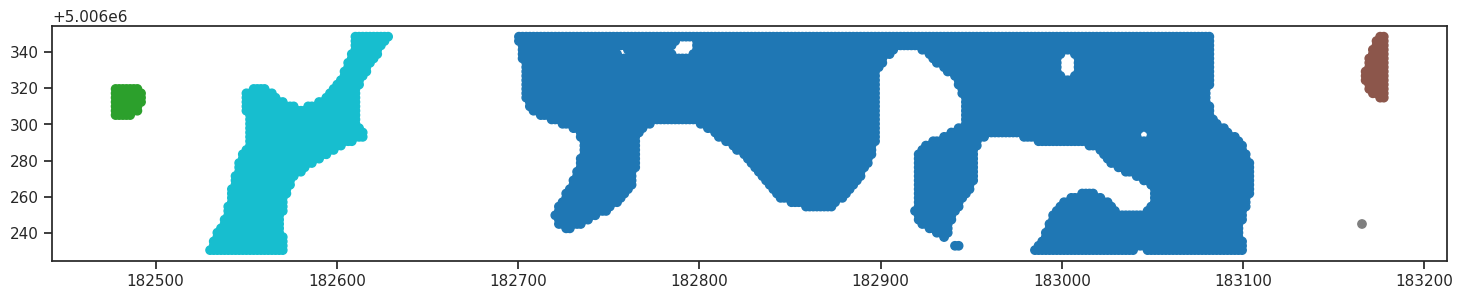

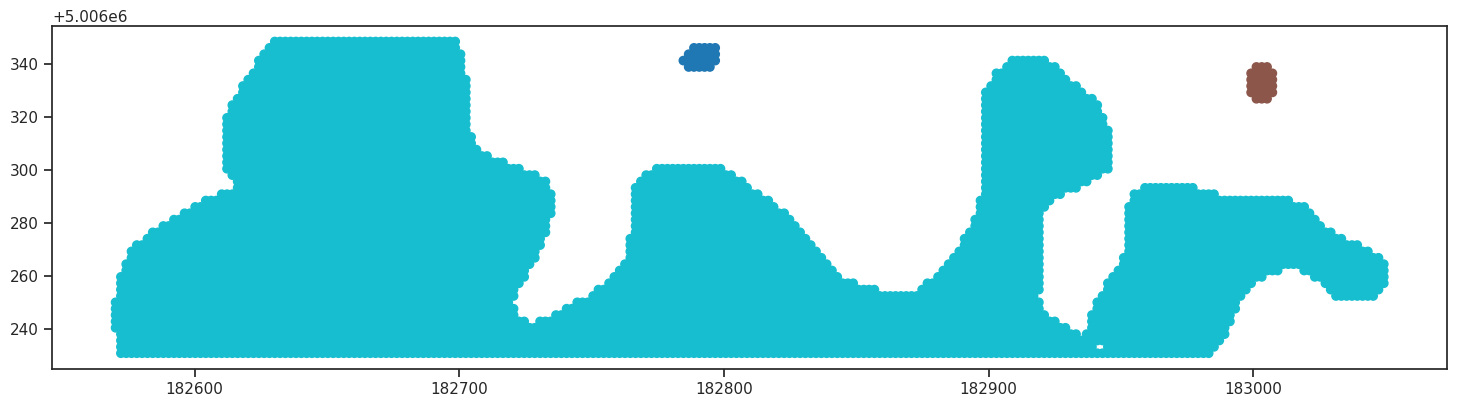

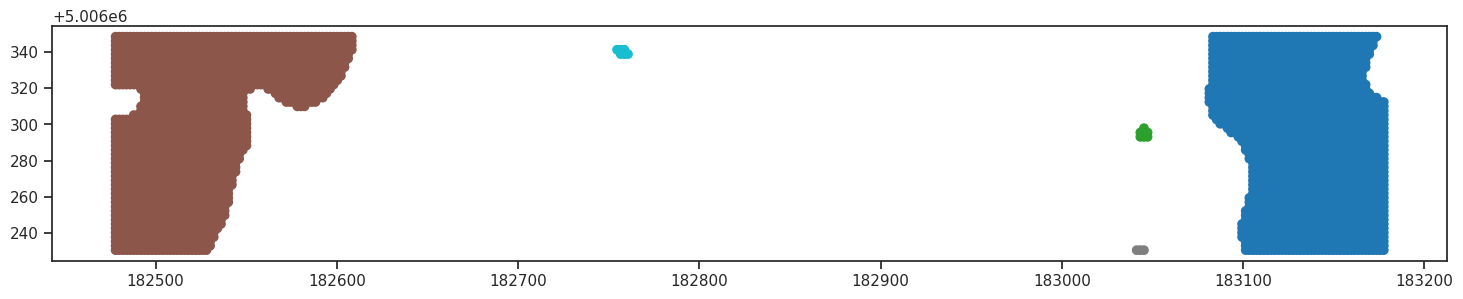

In [ ]:
gridx, gridy = np.meshgrid(grid_lon, grid_lat)
print(gridx.shape, gridy.shape, gridded_data.shape)

xpts = gridx.flatten()
ypts = gridy.flatten()
zvalues = gridded_data.flatten()

new_gdf = gpd.GeoDataFrame({
        "Cu": zvalues
    }, geometry=gpd.points_from_xy(xpts, ypts), crs="EPSG:32619")

#fig, ax = plt.subplots(figsize=(18,15))
#shape_file.plot(ax=ax, alpha=0.4, color='grey', legend=True)
#new_gdf.plot(column="Cu", ax=ax, legend=True,
    #legend_kwds={"label": "Teneur en cuivre", "orientation": "horizontal"},)
#contours = ax.contour(gridx, gridy, gridded_data, 3, colors='black', origin='lower')
#clabels = plt.clabel(contours, inline=True, fontsize=8)

new_gdf["clusters"] = clusters.flatten()
polygones = []

#Les grappes obtenues sont caractérisées par des indices [0,1,2] avec des doublons
new_labels = np.unique(clusters)# [0,1,2]

#
for index, label in enumerate(new_labels):
    sub_gdf = new_gdf[new_gdf['clusters']==index]

    centers = [p.centroid for p in sub_gdf.geometry]
    centers_xy = [[c.x, c.y] for c in centers]
    sub_clusters = cluster.AgglomerativeClustering(n_clusters=None,
                                      linkage='single',
                                      affinity='euclidean',
                                      distance_threshold=10)
    sub_clusters.fit(centers_xy)

    current_labels = sub_clusters.labels_

    if index :
        current_labels = [i + 1 + last_label for i in current_labels]

    sub_gdf['sub_clusters'] = current_labels
    last_label = max(current_labels)
    sub_gdf.plot(column='sub_clusters', categorical=True, figsize=(18,12))
    polygones.append(sub_gdf)

In [ ]:
pd.options.mode.chained_assignment = None
from shapely.ops import unary_union

Étape 12: Fusion des grappes avec une superficie négligeable par rapport à aux autres et!ou la ferme

/tmp/ipykernel_335/3113724994.py:43: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for new_elem in elem:


<Axes: >

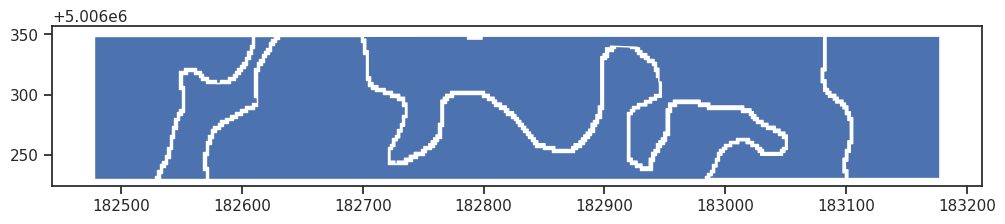

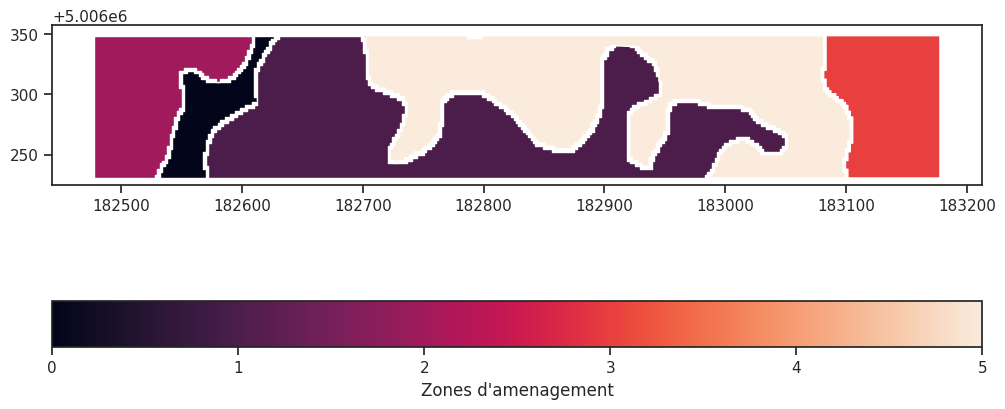

In [ ]:
#Création d'un conteneur de données
management_zones_gdf = gpd.GeoDataFrame(pd.concat([*polygones], axis=0)).reset_index().drop(columns=['index'])

sub_clusters_ = management_zones_gdf.dissolve(by='sub_clusters')

interval = 5 #mètre    
kwargs = {"cap_style": geometry.CAP_STYLE.square, "join_style": geometry.JOIN_STYLE.mitre}
boundary = sub_clusters_.buffer(interval/3.5, **kwargs).buffer(-interval/3.5, **kwargs)
superficie_moyenne = np.mean(boundary.area)

#Objectif de fusionner les petites superficies délimitées avec la plus proche des plus grandes
zones_principales = list(filter(lambda poly: (poly.area >= superficie_moyenne/10), boundary))

for index, elem in enumerate(zones_principales):
    if isinstance(elem, geometry.multipolygon.MultiPolygon):
        zones_principales.pop(index)
        for new_elem in elem:
            zones_principales.append(new_elem)

zones_secondaires = list(filter(lambda poly: (poly.area < superficie_moyenne/10), boundary))

for index, zone in enumerate(zones_secondaires):
    distances = list(map(lambda zp: zone.centroid.distance(zp), zones_principales))
    index_ = distances.index(min(distances))
    limite_petite_zone = geometry.Polygon(zone.exterior.coords)
    limite_grande_zone = geometry.Polygon(zones_principales[index_].exterior.coords) 

    if any(int(distance) != 0 for distance in distances) and min(distances) < 10:
        points_zp = geometry.mapping(limite_grande_zone)['coordinates'][0]
        points_zs = geometry.mapping(limite_petite_zone)['coordinates'][0]
        del zones_principales[index_]
        zones_principales.append(geometry.Polygon(points_zp + points_zs))
        #gpd.GeoSeries([geometry.Polygon(points_zp + points_zs)]).boundary.plot()               
        
boundary = gpd.GeoDataFrame({'geometry': zones_principales}, 
                                    index=range(len(zones_principales))).buffer(5, 
                                        **kwargs).buffer(-5, **kwargs)
boundary.plot(figsize=(12,10))
zones = []

for index, elem in enumerate(boundary):
    if isinstance(elem, geometry.multipolygon.MultiPolygon):
        for new_elem in elem:
            zones.append(new_elem)
    else:
        zones.append(elem)

gdf = gpd.GeoDataFrame({'geometry': [geometry.Polygon(zone.exterior.coords) for zone in zones], 
                        'clusters': range(len(zones))
                        }, index=range(len(zones))
                        ) 
   
gdf.crs='epsg:32619'
gdf.set_geometry('geometry')

gdf.plot(column='clusters', figsize=(12,10), legend=True,
    legend_kwds={"label": "Zones d'amenagement", "orientation": "horizontal"},
    )

Étape 13: Exportation des formes générées

In [ ]:
import folium

In [ ]:
gdf = gdf.to_crs(epsg=4326)
gdf.to_file('/work/Tou1c.geojson', driver="GeoJSON")

In [ ]:
m = folium.Map(location=[45.138130802554869, -73.037725141799044], zoom_start=17, tiles="CartoDB positron")

folium.GeoJson(gpd.read_file('/work/Tou1c.geojson')).add_to(m)
m

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e73186c2-ac29-4da1-91b3-792e23120dcc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>